In [17]:
# python stuff
import glob

# other
import torch
import matplotlib.pyplot as plt

# list .pt files that will be plotted
filenames = glob.glob("out/*.pt")
filenames

['out/losses-42.pt', 'out/losses-13.pt', 'out/losses-65.pt']

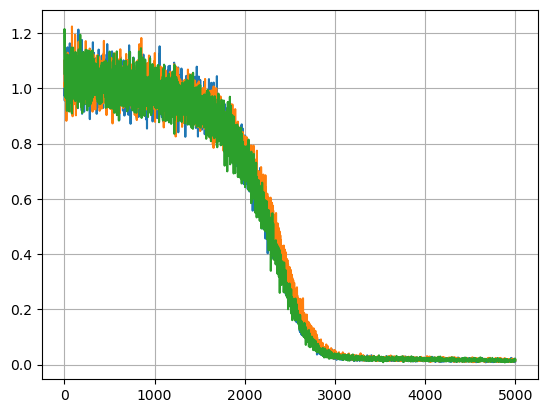

In [18]:
plt.grid()
for file in filenames:
    losses = torch.load(file)
    plt.plot(losses)
    
plt.show()